In [2]:
import torch
import numpy as np

In [3]:
# tensor 和 numpy 对象的相互转化
a = np.array([[1, 2, 3], [4, 5, 6]])
b = torch.tensor(a)
c = b.numpy()
type(a), type(b), type(c)

(numpy.ndarray, torch.Tensor, numpy.ndarray)

In [4]:
# 只有一个元素的向量可以转化为标量
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

In [5]:
# reshape的一些特性
a = torch.arange(12)
b = a.reshape(3, 4)
b[:] = 2    # 修改所有的值
a, b   # 地址没有改变，实在原地址上进行操作，但是形状又不一样

(tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 tensor([[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]]))

In [6]:
import sympy as sp
import numpy as np

In [68]:
X = np.array([[3, 3], [4, 3], [1, 1]])
y = np.array([1, 1, -1])
# 通过样本数量创建相应的拉格朗日乘子
alphas = sp.Matrix([sp.symbols('alpha_0:%d' % X.shape[0])])
weights = sp.Matrix([sp.symbols('w_0:%d' % X.shape[1])])
b = sp.symbols('b')

# n = sp.Idx('i', (1, X.shape[0]))
# n, i, j = sp.symbols('n i j', integer=True)

# 构建目标函数
objective_func = np.sum([weight**2 for weight in weights]) / 2
# objective_func = sp.Sum([weight**2 for weight in weights], (i, 1, n)) / 2

# 构建约束函数
subject_to_func = sp.Matrix([1-yi*(np.sum(weights*Xi)+b) for yi, Xi in zip(y, X)])
# 构建拉格朗日函数
lagrange_func = objective_func + np.sum([lam*st for lam, st in zip(alphas, subject_to_func)])
# sp.diff(lagrange_func, weights[0])
diff_w = sp.Matrix([sp.diff(lagrange_func, weights[i]) for i in range(weights.shape[1])])
# diff_w, lagrange_func, subject_to_func
# alphas.T
diff_b = sp.diff(lagrange_func, b)
lagrange_func

alpha_0*(-b - 3*w_0 - 3*w_1 + 1) + alpha_1*(-b - 4*w_0 - 3*w_1 + 1) + alpha_2*(b + w_0 + w_1 + 1) + w_0**2/2 + w_1**2/2

In [62]:
alpha_st_kkts = alphas.T * subject_to_func.T
# alpha_st_kkts.shape
# a = [item for item in sp.Matrix(alpha_st_kkts)]
# a = np.array([item for item in sp.Matrix(alpha_st_kkts)]).reshape(3, 3)

alpha_st_kkts = sp.Matrix([item for item in np.diag(np.array([elem for elem in sp.Matrix(alphas.T * subject_to_func.T)]).reshape(3, 3))])
# alphas*subject_to_func.T
# subject_to_func
# [alphas.T * subject_to_func.T][0].shape
# subject_to_func.T
alpha_st_kkts

Matrix([
[alpha_0*(-b - 3*w_0 - 3*w_1 + 1)],
[alpha_1*(-b - 4*w_0 - 3*w_1 + 1)],
[     alpha_2*(b + w_0 + w_1 + 1)]])

In [38]:
alpha_kkts = sp.Matrix([sp.Ge(alpha, 0) for alpha in alphas])
alpha_kkts

Matrix([
[alpha_0 >= 0],
[alpha_1 >= 0],
[alpha_2 >= 0]])

In [60]:
st_kkts = sp.Matrix([sp.Le(st, 0) for st in subject_to_func])
st_kkts

Matrix([
[-b - 3*w_0 - 3*w_1 + 1 <= 0],
[-b - 4*w_0 - 3*w_1 + 1 <= 0],
[     b + w_0 + w_1 + 1 <= 0]])

In [69]:
solve = sp.solve([*diff_w, diff_b, *alpha_st_kkts], [*weights, b, *alphas])
# [*diff_w, diff_b, *alpha_st_kkts]
# [*weights, b, *alphas]
result = sp.Matrix(solve)
w = result[:, 0:weights.shape[1]]
print(result.shape)
a = result[:, 3:result.shape[1]]
print(result.shape)
b = result[:, weights.shape[1]]
print(result.shape)
# b
solve
type(b), type(a)

(5, 6)
(5, 6)
(5, 6)


(sympy.matrices.dense.MutableDenseMatrix,
 sympy.matrices.dense.MutableDenseMatrix)

In [72]:

for i, j, k in zip(w.T, b.T, a.T):
    dic = {'w': i, 'b': j, 'a': k}
    print(dic)
w.shape, b.shape, a.shape    

0
{'w': 0, 'b': -1, 'a': 0}
0
{'w': 0, 'b': b, 'a': 0}
0
{'w': 0, 'b': -2, 'a': 3/2}
6/13
{'w': 6/13, 'b': -23/13, 'a': 0}
1/2
{'w': 1/2, 'b': -2, 'a': 1/4}


((5, 2), (5, 1), (5, 3))

In [12]:
solve

[(0, 0, -1, 0, 0, 0),
 (0, 0, b, 0, 0, 0),
 (0, 1, -2, 3/2, -1, 1/2),
 (6/13, 4/13, -23/13, 0, 2/13, 2/13),
 (1/2, 1/2, -2, 1/4, 0, 1/4)]

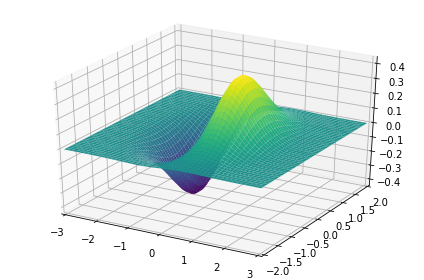

x*exp(-x**2 - y**2)

In [13]:
from sympy.plotting import plot3d
x, y = sp.symbols('x, y')
plot3d(x*sp.exp(-x**2 - y**2), (x, -3, 3), (y, -2, 2))
formula = x*sp.exp(-x**2 - y**2)
formula

In [14]:
import sympy.stats as stat
a = sp.Matrix(sp.symbols(' '.join([('a_%d' % i) for i in range(10)])))
y = sum([a[m]*x**m for m in range(10)])
sp.summation(a[0], (j, 1, i))
sp.Matrix(sp.symbols('a_0:%d' % 10)).T

NameError: name 'j' is not defined